In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#### 폰트 깨짐 현상 해결

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (39.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123605 files and direc

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

# EDA

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/GBT_hackerton/train.csv")
df

,ID,분류,제목,키워드
0,TRAIN_00000,문화:전시_공연,"용인문화재단, 인문학 콘서트 ‘당신이 모르는 뮤지컬 이야기Ⅳ’ 개최","용인문화재단,인문학,콘서트,뮤지컬,이야기,개최,인문학,콘서트,뮤지컬,이야기,용인문화..."
1,TRAIN_00001,지역,"용인 농촌테마파크, 7~8월 단체체험객 체험료 지원","용인,농촌,테마파크,단체,체험객,체험료,지원,15일,체험일,기준,용인시통합예약사이트..."
2,TRAIN_00002,지역,"용인시, 노후주택 에너지 성능 개선 신청 18일까지 연장","용인시,노후,주택,에너지,성능,개선,신청,연장,용인시청,용인시,노후,건축물,환경친화..."
3,TRAIN_00003,지역,"수원 용인 고양시,‘특례시’로 지정 도시경쟁력 증가 기대","수원,용인,고양시,특례시,지정,도시경쟁력,증가,경기,도내,인구,수원,고양,용인시,특..."
4,TRAIN_00004,국제,"용인시, 스페인 미국 국제명예자문관 위촉 대외홍보 지원 역할","용인시,스페인,미국,국제,명예,자문관,위촉,역할,대외,홍보,지원,용인시,권태면,주코..."
...,...,...,...,...
54604,TRAIN_54604,국제,"용인 아파트서 30대 여성, 아들 딸 함께 추락 ""극단 선택 추정""","용인,아파트,여성,아들,추락,극단,선택,추정,경찰,현장,유서,경위,조사,처인구,경기..."
54605,TRAIN_54605,사회:교육_시험,"용인시, '위탁부모 보수교육' 실시","용인시,위탁,부모,보수,교육,용인시,경기,남부,가정,위탁,지원,센터,시청,컨퍼런스,..."
54606,TRAIN_54606,지역,"용인시, '플랫폼 시티' 국토부에 사업인정 협의 신청","용인시,플랫폼,시티,국토부,신청,사업,인정,협의,경기,용인시,중앙토지수용위원회,국토..."
54607,TRAIN_54607,지역,"용인시 이동읍 주민자치위원회, 저소득 20가구에 밑반찬 지원","주민자치위원회,용인시,이동읍,주민,자치,위원회,가구,밑반찬,지원,용인시,처인구,이동..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54609 entries, 0 to 54608
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      54609 non-null  object
 1   분류      54609 non-null  object
 2   제목      54609 non-null  object
 3   키워드     54609 non-null  object
dtypes: object(4)
memory usage: 1.7+ MB


In [ ]:
# 레이블 종류 확인
category = df['분류'].unique()
print(category)

['문화:전시_공연' '지역' '국제' '정치:선거' '경제:금융_재테크' '사회:의료_건강' '정치:행정_자치' '정치:국회_정당'
 '스포츠:축구' '경제:서비스_쇼핑' '경제:부동산' '사회:교육_시험' '사회:미디어' 'IT_과학:인터넷_SNS'
 '사회:장애인' '사회:노동_복지' '경제:경제일반' '정치:정치일반' '사회:사회일반' '문화:문화일반' '경제:취업_창업'
 '사회:사건_사고' '스포츠:올림픽_아시안게임' '사회:환경' '정치:외교' '경제:산업_기업' '스포츠:골프' '경제:유통'
 'IT_과학:모바일' '사회:여성' '사회:날씨' '문화:방송_연예' 'IT_과학:IT_과학일반' '경제:반도체' '경제:자원'
 '문화:종교' '경제:자동차' '경제:무역' 'IT_과학:콘텐츠' '경제:증권_증시' 'IT_과학:과학' '경제:외환'
 '문화:요리_여행' '정치:청와대' '문화:출판' '문화:미술_건축' '문화:음악' '스포츠:농구_배구' '문화:생활'
 '정치:북한' '스포츠:야구' '문화:학술_문화재' 'IT_과학:보안' '문화:영화' '스포츠:월드컵' '스포츠:스포츠일반']


In [ ]:
# 레이블 개수
len(category)

56

In [ ]:
df.loc[0,'키워드']

'용인문화재단,인문학,콘서트,뮤지컬,이야기,개최,인문학,콘서트,뮤지컬,이야기,용인문화재단,용인문화재단,제공,시민들,심신,여유,안정,인문학,콘서트,개최,재단,18일,큰어울마당,용인시,평생,학습관,인문학,콘서트,뮤지컬,이야기,인문학,콘서트,방송,매체,왕성,활동,뮤지컬,평론가,교수,원종원,순천향대,진행,이건명,김소향,김보경,유건우,배우들,정상급,뮤지컬,배우,라이브,무대,동시,만끽,공연,공연,홍지민,뮤지컬,배우,참여,라이브,무대,선사,영화,뮤지컬,합성어,무비컬,주제,맘마미아,드림걸즈,유명,작품,교수,위트,해설,예정,공연,초등학생,관람,초등학생,가능,티켓,가격,전석,공연,용인문화재단,누리집,확인'

In [ ]:
# 최대 키워드 개수
maxlen = 0
for i in range(len(df)):
    keyword_list = df.loc[i,'키워드'].split(',')
    if len(keyword_list) >= maxlen:
        maxlen = len(keyword_list)
        idx = i
print('최대 키워드 개수:',maxlen)
print('해당 인덱스:', idx)

최대 키워드 개수: 2669
해당 인덱스: 50050


In [ ]:
keywords = df.loc[50050, '키워드']
keyword_list = keywords.split(',')
word_count = len(keyword_list)

print(f"단어 개수: {word_count}")

단어 개수: 2669


In [ ]:
# 평균 키워드 개수
all_keyword = 0
for i in range(len(df)):
    keyword_list = df.loc[i,'키워드'].split(',')
    all_keyword += len(keyword_list)
    avglen = all_keyword/len(df)
print('평균 키워드 개수:',avglen)

평균 키워드 개수: 175.39026534087787


In [ ]:
# 각 기사별 키워드의 개수 리스트
num_list = []
for i in range(len(df)):
    keyword_list = df.loc[i,'키워드'].split(',')
    num_list.append(len(keyword_list))
num_list

[88,
 102,
 94,
 249,
 111,
 107,
 298,
 126,
 137,
 178,
 125,
 354,
 193,
 164,
 209,
 165,
 83,
 153,
 136,
 234,
 118,
 118,
 145,
 147,
 129,
 279,
 18,
 95,
 146,
 90,
 178,
 171,
 219,
 101,
 195,
 107,
 109,
 161,
 307,
 147,
 69,
 100,
 151,
 28,
 88,
 106,
 128,
 198,
 1027,
 274,
 118,
 108,
 153,
 1840,
 152,
 85,
 191,
 109,
 156,
 275,
 94,
 152,
 161,
 123,
 24,
 139,
 116,
 240,
 94,
 103,
 91,
 127,
 46,
 120,
 115,
 374,
 72,
 104,
 144,
 88,
 88,
 111,
 93,
 128,
 112,
 265,
 495,
 38,
 331,
 79,
 468,
 278,
 287,
 127,
 185,
 148,
 107,
 14,
 104,
 113,
 139,
 169,
 254,
 63,
 674,
 92,
 149,
 148,
 181,
 462,
 81,
 116,
 107,
 231,
 155,
 84,
 109,
 157,
 243,
 212,
 396,
 181,
 144,
 118,
 196,
 153,
 169,
 451,
 123,
 159,
 372,
 91,
 194,
 124,
 149,
 111,
 121,
 262,
 968,
 178,
 233,
 179,
 345,
 110,
 67,
 157,
 141,
 145,
 38,
 227,
 589,
 162,
 73,
 85,
 40,
 148,
 228,
 30,
 141,
 251,
 198,
 267,
 192,
 142,
 186,
 250,
 81,
 86,
 130,
 176,
 20,
 39,
 11

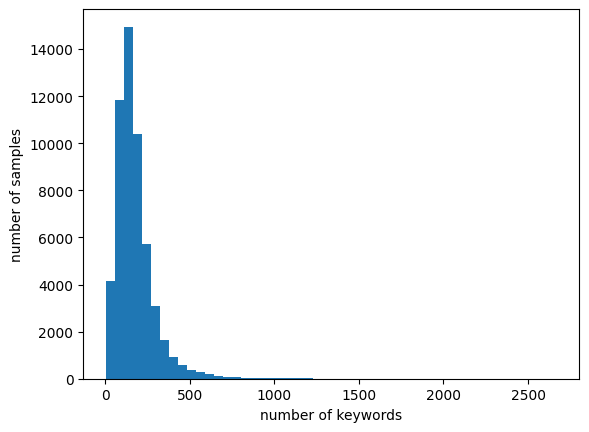

In [ ]:
# 시각화
plt.hist(num_list, bins=50)
plt.xlabel('number of keywords')
plt.ylabel('number of samples')
plt.show()


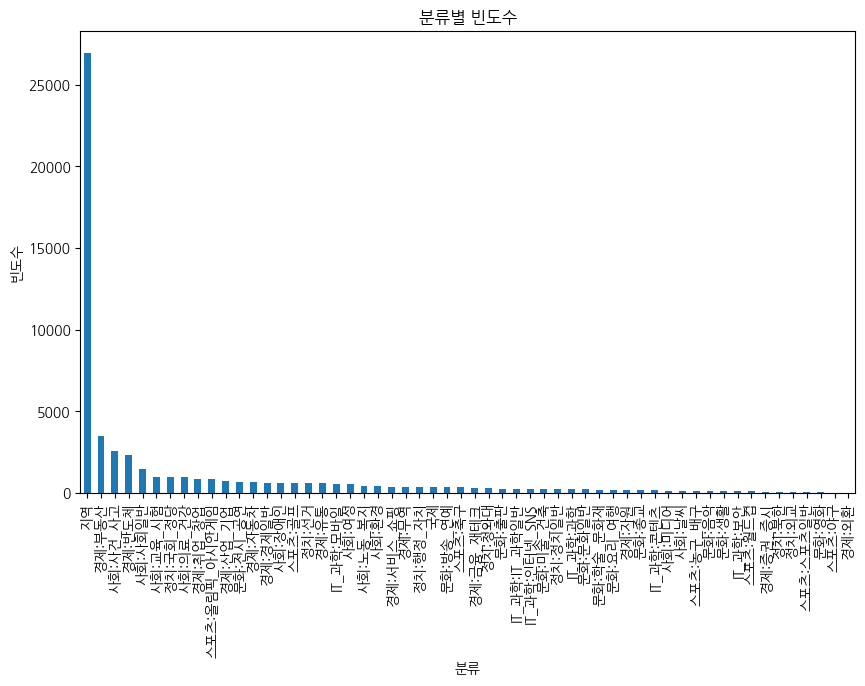

In [ ]:
import warnings

# 경고 메시지 억제
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (NanumGothic 폰트)
plt.rcParams['font.family'] = 'NanumGothic'

label_counts = df['분류'].value_counts()

# 그래프 그리기
plt.figure(figsize=(10,6))
label_counts.plot(kind='bar')

# 축 이름 지정
plt.xlabel('분류')
plt.ylabel('빈도수')

# 그래프 제목 추가
plt.title('분류별 빈도수')

# 그래프 출력
plt.show()

In [ ]:
df['분류'].value_counts()

,count
분류,
지역,26950
경제:부동산,3454
사회:사건_사고,2568
경제:반도체,2318
사회:사회일반,1480
사회:교육_시험,995
정치:국회_정당,966
사회:의료_건강,950
경제:취업_창업,845


거의 반절이 '지역'....?

In [ ]:
# 모든 키워드를 하나의 리스트 안에 저장
keywords = []
for i in range(len(df)):
    keyword_list = df.loc[i,'키워드'].split(',')
    keywords.extend(keyword_list)
keywords

['용인문화재단',
 '인문학',
 '콘서트',
 '뮤지컬',
 '이야기',
 '개최',
 '인문학',
 '콘서트',
 '뮤지컬',
 '이야기',
 '용인문화재단',
 '용인문화재단',
 '제공',
 '시민들',
 '심신',
 '여유',
 '안정',
 '인문학',
 '콘서트',
 '개최',
 '재단',
 '18일',
 '큰어울마당',
 '용인시',
 '평생',
 '학습관',
 '인문학',
 '콘서트',
 '뮤지컬',
 '이야기',
 '인문학',
 '콘서트',
 '방송',
 '매체',
 '왕성',
 '활동',
 '뮤지컬',
 '평론가',
 '교수',
 '원종원',
 '순천향대',
 '진행',
 '이건명',
 '김소향',
 '김보경',
 '유건우',
 '배우들',
 '정상급',
 '뮤지컬',
 '배우',
 '라이브',
 '무대',
 '동시',
 '만끽',
 '공연',
 '공연',
 '홍지민',
 '뮤지컬',
 '배우',
 '참여',
 '라이브',
 '무대',
 '선사',
 '영화',
 '뮤지컬',
 '합성어',
 '무비컬',
 '주제',
 '맘마미아',
 '드림걸즈',
 '유명',
 '작품',
 '교수',
 '위트',
 '해설',
 '예정',
 '공연',
 '초등학생',
 '관람',
 '초등학생',
 '가능',
 '티켓',
 '가격',
 '전석',
 '공연',
 '용인문화재단',
 '누리집',
 '확인',
 '용인',
 '농촌',
 '테마파크',
 '단체',
 '체험객',
 '체험료',
 '지원',
 '15일',
 '체험일',
 '기준',
 '용인시통합예약사이트',
 '접수',
 '용인특례시',
 '7월',
 '8월',
 '농촌테마파크',
 '진행',
 '체험행사',
 '참여',
 '지역',
 '단체',
 '관람객',
 '체험료',
 '50%',
 '지원',
 '22일',
 '지원',
 '기준',
 '지역',
 '기관',
 '단체',
 '지원기간',
 '최소인원',
 '20명',
 '10명',
 '인원',
 '최대',
 '신청',
 '70명',
 '농촌테마파크',

In [ ]:
# 빈도수 상위 top 10 키워드

from collections import Counter

# 키워드의 빈도수 계산
keyword_counts = Counter(keywords)

# 상위 10개의 키워드 찾기
top_10_keywords = keyword_counts.most_common(10)

print("빈도수 상위 top 10:")
for keyword, count in top_10_keywords:
    print(f"{keyword}: {count}")

빈도수 상위 top 10:
용인시: 102752
용인: 68534
사업: 52452
지역: 52184
지원: 51558
시장: 48773
반도체: 47196
경기도: 44481
경기: 39922
계획: 34875


### 분류별 빈도수 상위 top 15 키워드

### 불필요한 키워드 제거
- 영향 없는 공용 키워드
- 빈도수가 현저히 낮은 키워드

In [ ]:
# 빈도수 가 1~3인 키워드 제거

filtered_keywords = {keyword: count for keyword, count in keyword_counts.items() if 1 <= count <= 3}

print("빈도수가 1~3인 키워드:")
for keyword, count in filtered_keywords.items():
    print(f"{keyword}: {count}")

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
볼테르: 1
똘레랑스: 1
뜬소문: 1
도로주변: 1
1081원: 1
1304원: 1
1176원: 1
1109원: 1
2286만: 1
2907만: 1
구룡공원: 1
시중시세: 1
클린워터: 1
송두근: 1
환경안전센터장: 1
대출막차: 1
4979건: 1
3763건: 1
1376건: 1
직장인대출: 1
menu: 2
개발비리: 2
관합동: 1
cbskkic: 1
광교새: 3
택지개발사업지구: 1
광교새도시: 3
중재판정: 3
정산금액: 1
합의사항: 1
대한상사: 3
아동학대살해죄: 1
여성청소년범죄수사대: 2
Payco: 1
relieves: 1
lize: 2
3471억: 3
라켓보이즈: 2
17인: 1
타임리스: 1
차콜: 1
그레이지: 1
치즈인더트랩: 1
인더트랩: 1
신혼편: 1
약식처분: 3
창작동화: 1
논술수업: 1
추행행위: 1
자유의사: 2
한예찬씨: 1
675권: 1
절판: 2
24권: 1
틴틴: 2
결혼반지: 1
루삐: 1
소미: 1
최철민: 1
선화공주: 1
아도나이: 2
아나스타샤: 1
평강공주: 1
샤프펜슬: 1
의자왕: 1
계선공주: 1
컬러렌즈: 1
바비공주: 1
다혜: 2
구슬아씨: 1
역사물: 2
판타지물: 1
밀크걸: 1
비밀노트: 1
가문비: 3
무죄추정원칙: 1
아동청소년성: 1
이정연: 2
번방: 1
신진희: 1
아동동화작가: 1
쓰쓰: 2
야스타카: 1
쓰쓰이: 1
예정작도: 1
제기류: 1
ㆍ벼: 1
신주산업단지: 1
1라인: 1
타이페이: 2
미디어텍: 2
국제통신사: 1
총통부: 1
3000년: 1
상업주간: 1
투자안: 1
주대영: 1
아태지역: 1
규제기관: 2
S.T.A.R.: 1
자원고갈: 1
회계금융연합: 1
PBAF: 1
하나금융: 2
지속가능경영위원회: 2
정보공개기준: 1
480시간: 1
180~280시간: 1
죽집: 1
위장약: 2
280시간: 1
서울서: 1
설마리: 2
글로스터: 1
대대원: 1
잭슨군: 1
630가구: 2
39.

KeyboardInterrupt: 

### 한글 외의 텍스트가 있는지 확인